# 1 Import dependencies

In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(color_codes=True)
import os
import matplotlib.pyplot as plt
#encoder dataset
from sklearn.preprocessing import LabelEncoder
#devide dataset using train and test
from sklearn.model_selection import train_test_split
#standardScalern
from sklearn.preprocessing import StandardScaler
#minmaxScaler
from sklearn.preprocessing import MinMaxScaler
#for create model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [2]:
#print names of files in ML_assignment folder
print(os.listdir())

['.ipynb_checkpoints', 'Assignment2.ipynb', 'Assignment2Final.ipynb', 'Used_car_prices_in_Pakistan 2021_rawD.csv']


# 2 Import and identify dataset

In [11]:
#import data-set
dfUsedCar = pd.read_csv("Used_car_prices_in_Pakistan 2021_rawD.csv")

In [12]:
#first five rows
dfUsedCar.head()

,Make,Model,Version,Price,Make_Year,CC,Assembly,Mileage,Registered City,Transmission
0,Honda,Insight,NaN,7400000.0,2019,1500,Imported,2000,Un-Registered,Automatic
1,Mitsubishi,Minica,Black Minica,1065000.0,2019,660,Imported,68000,Lahore,Automatic
2,Audi,A6,1.8 TFSI Business Class Edition,9300000.0,2015,1800,Local,70000,Lahore,Automatic
3,Toyota,Aqua,G,2375000.0,2014,1500,Imported,99900,Islamabad,Automatic
4,Honda,City,1.3 i-VTEC,2600000.0,2017,1300,Local,55000,Islamabad,Manual


In [13]:
#last five rows
dfUsedCar.tail()

,Make,Model,Version,Price,Make_Year,CC,Assembly,Mileage,Registered City,Transmission
80567,Suzuki,Bolan,NaN,750000.0,2015,800,Local,98000,Lahore,Manual
80568,Suzuki,Alto,VXR,1480000.0,2020,660,Local,7800,Karachi,Manual
80569,Toyota,Corolla,GLi Automatic 1.3 VVTi,2700000.0,2016,1300,Local,81000,Islamabad,Automatic
80570,FAW,X-PV,Standard,600000.0,2013,1000,Local,2,Lahore,Manual
80571,Honda,Civic,VTi Prosmatec 1.8 i-VTEC,2620000.0,2013,1800,Imported,100000,Islamabad,Automatic


In [14]:
#shape of the dataset(number of rows and columns)
dfUsedCar.shape

(80572, 10)

In [15]:
dfUsedCar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80572 entries, 0 to 80571
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Make             80572 non-null  object
 1   Model            80572 non-null  object
 2   Version          73800 non-null  object
 3   Price            80572 non-null  object
 4   Make_Year        80572 non-null  int64 
 5   CC               80572 non-null  int64 
 6   Assembly         80572 non-null  object
 7   Mileage          80572 non-null  int64 
 8   Registered City  80572 non-null  object
 9   Transmission     80572 non-null  object
dtypes: int64(3), object(7)
memory usage: 6.1+ MB


In [16]:
print(dfUsedCar['Version'].unique())

[nan 'Black Minica' '1.8 TFSI Business Class Edition' ... 'Trail 2.0 GT'
 '3' 'Wagon 20S']


In [17]:
print(dfUsedCar['CC'].unique())

[ 1500   660  1800  1300  1000  1600  3000   800  2000  2800  2500  3400
  2700  4600  4200  4700  4000  5000  1200  3500  2400  4608  5700  3200
  4400  2100  8494     1  2200   700   100  2900   123     6  1400  1900
  4500  1700  2300  1100  5500    30   860  3342  3300   125  2600  3700
  4800    45  5663 10000    28  4300   300  5552  3600   950  4100   900
  6200   600  5539  3378  2890     5   350   130  1699  6000   890  4663
    16  1111  4164  3800  7000    12   880    13     7   598  4760  3724
  2928  6500   930   898  4461   897   750  2185  2184  6600  6300   887
  2222  1122  5300  3311  3224   933  3450  5600  3950   749  5200  2268
  5379  4476  3883  2599  3900]


In [18]:
print(dfUsedCar['Assembly'].unique())

['Imported' 'Local']


In [19]:
print(dfUsedCar['Mileage'].unique())

[  2000  68000  70000 ...  16605 146100   7745]


In [20]:
print(dfUsedCar['Registered City'].unique())

['Un-Registered' 'Lahore' 'Islamabad' 'Karachi' 'Faisalabad' 'Multan'
 'Gujranwala' 'Rawalpindi' 'Abottabad' 'Peshawar' 'Sialkot' 'Mirpur A.K.'
 'Vehari' 'Bahawalpur' 'Hyderabad' 'Quetta' 'Other' 'Jhang' 'Lodhran'
 'Okara' 'Sara-E-Alamgir' 'Jehlum' 'Narowal' 'Mian Channu' 'Bahawal Nagar'
 'Gujrat' 'Toba Tek Singh' 'Swat' 'Lower Dir' 'Abdul Hakeem' 'Shaikhupura'
 'Mansahra' 'Jacobabad' 'D.G.Khan' 'Chakwal' 'Dera ismail khan'
 'Wah cantt' 'Sargodha' 'Attock' 'Sahiwal' 'Khanewal' 'Rahim Yar Khan'
 'Mardan' 'Chiniot' 'Kharian' 'Dunia Pur' 'Kohat' 'Depal pur'
 'Mandi bahauddin' 'Hari pur' 'Sukkur' 'Kotly Ak' 'Muzaffarabad'
 'Muzaffar Gargh' 'Chishtian' 'Daska' 'Lasbella' 'Haroonabad' 'Shikar pur'
 'Panjan kisan' 'Bhakkar' 'Kashmir' 'Nawabshah' 'Mirpur khas'
 'Nowshera cantt' 'Hafizabad' 'Burewala' 'Dir' 'Rawala kot' 'Badin'
 'Bannu' 'Hassan abdal' 'Charsadda' 'Kallar Saddiyian' 'Fort Abbass'
 'Raiwind' 'Iskandarabad' 'Bat khela' 'Muridkay' 'Liaqat Pur' 'Gujar Khan'
 'Gilgit' 'Nankana sahib'

In [21]:
print(dfUsedCar['Transmission'].unique())

['Automatic' 'Manual']


In [22]:
print(dfUsedCar['Make'].unique())


['Honda' 'Mitsubishi' 'Audi' 'Toyota' 'Daihatsu' 'Suzuki' 'MG' 'KIA'
 'Hyundai' 'Land' 'Mercedes' 'Changan' 'Nissan' 'Subaru' 'Lexus' 'FAW'
 'Range' 'Volkswagen' 'Chevrolet' 'Ford' 'Proton' 'BMW' 'Mazda' 'Isuzu'
 'Adam' 'Others' 'United' 'Prince' 'Porsche' 'Daewoo' 'Chery' 'Daehan'
 'Citroen' 'Hummer' 'Buick' 'Jeep' 'JAC' 'DFSK' 'JMC' 'JW' 'Tesla' 'ZOTYE'
 'Datsun' 'Bentley' 'Master' 'Plymouth' 'Chrysler' 'Dodge' 'GMC' 'Sogo'
 'Volvo' 'Hino' 'Fiat' 'Jaguar' 'Peugeot' 'SsangYong' 'Cadillac' 'MINI'
 'Roma' 'Sokon' 'Jinbei' 'Golden' 'Renault' 'Dongfeng' 'Rover' 'Geely']


In [23]:
print(dfUsedCar['Make_Year'].unique())

[2019 2015 2014 2017 2011 2012 2006 2001 2008 2005 2007 2021 2018 2013
 2009 2016 2004 2002 2010 1997 1995 2020 1993 2003 1994 2000 1998 1991
 1992 1990 1996 1999]


In [24]:
print(dfUsedCar['Model'].unique())

['Insight' 'Minica' 'A6' 'Aqua' 'City' 'Hijet' 'Corolla' 'Cultus' 'Passo'
 'Prius' 'Vitz' 'Belta' 'Civic' 'Hilux' 'Premio' 'Bolan' 'HS' 'Sportage'
 'ZS' 'Vezel' 'Yaris' 'Elantra' 'Mira' 'Mehran' 'Boon' 'Sienta' 'Kei'
 'Rover' 'Surf' 'Khyber' 'Fortuner' 'Alto' 'Benz' 'Land' 'Alsvin' 'Vitara'
 'BR-V' 'Allion' 'Mega' 'Move' 'Cuore' 'Prado' 'Wagon' 'Mark' 'Swift'
 'Ravi' 'Fit' 'Santro' 'Minicab' 'Cast' 'Mirage' 'Every' 'Otti' 'Stella'
 'Life' 'Picanto' 'N' 'Dayz' 'Rush' 'e-tron' 'AD' 'Pajero' 'Grace' 'Note'
 'RX' 'X-PV' 'Liana' 'Accord' 'A800' 'Terios' 'Tucson' 'A3' 'Other' 'Voxy'
 'Hiace' 'Baleno' 'Clipper' 'Raum' 'LX' 'March' 'iQ' 'Up' 'Matiz' 'Lancer'
 'C-HR' 'Platz' 'Ranger' 'Ek' 'I' 'Avanza' 'Crown' 'X70' 'F' 'Galant' '7'
 'EK' 'Caravan' 'Potohar' 'Airwave' '3' 'Corona' 'L200' 'Pickup'
 'Margalla' 'Rav4' 'Esse' 'Acty' 'Classic' 'MR' 'Pleo' 'Harrier' 'Flair'
 'Navara' 'Vamos' 'NKR' 'Revo' 'Aygo' 'Camry' 'Karvaan' 'Spike' 'Coaster'
 '5' 'Joy' 'Noah' 'Estima' 'Cervo' 'Carrier' 'HR-V' 'Sk

# 3 Data Cleaning : Detecting NAN values

In [25]:
#Number of null value
dfUsedCar.isnull().sum()

Make                  0
Model                 0
Version            6772
Price                 0
Make_Year             0
CC                    0
Assembly              0
Mileage               0
Registered City       0
Transmission          0
dtype: int64

# 3.1 Detecting null values

In [26]:
missing_value=["NaN","Call for price",np.nan]
dfUsedCar = pd.read_csv("Used_car_prices_in_Pakistan 2021_rawD.csv", na_values=missing_value)

In [27]:
dfUsedCar.isnull().any()

Make               False
Model              False
Version             True
Price               True
Make_Year          False
CC                 False
Assembly           False
Mileage            False
Registered City    False
Transmission       False
dtype: bool

In [28]:
#Number of null value
dfUsedCar.isnull().sum()

Make                  0
Model                 0
Version            6772
Price              1209
Make_Year             0
CC                    0
Assembly              0
Mileage               0
Registered City       0
Transmission          0
dtype: int64

In [29]:
# Mean value % in null values
dfUsedCar.isnull().mean()

Make               0.000000
Model              0.000000
Version            0.084049
Price              0.015005
Make_Year          0.000000
CC                 0.000000
Assembly           0.000000
Mileage            0.000000
Registered City    0.000000
Transmission       0.000000
dtype: float64

# 3.2 Add mean value in 'version' variable to the null values

In [31]:
dfUsedCar['Version'].mode()


0    GLi 1.3 VVTi
dtype: object

In [32]:
dfUsedCar['Version'].fillna('GLi 1.3 VVTi', inplace=True)

In [33]:
dfUsedCar['Version'].isnull().sum()

0

In [34]:
dfUsedCar['Price'].mode()

0    750000.0
dtype: float64

In [35]:
dfUsedCar['Price'].fillna('750000.0', inplace=True)

In [36]:
dfUsedCar['Price'].isnull().sum()

0

# 4 Data analysis

# 4.1 Distribution of categorical data

In [38]:
print(dfUsedCar.Make.value_counts())

Toyota      29793
Suzuki      24209
Honda       15186
Daihatsu     3016
KIA          1321
            ...  
Jinbei          1
Renault         1
Bentley         1
Rover           1
Geely           1
Name: Make, Length: 66, dtype: int64


In [39]:
print(dfUsedCar.Assembly.value_counts())

Local       54498
Imported    26074
Name: Assembly, dtype: int64


In [40]:

print(dfUsedCar.Transmission.value_counts())

Automatic    40408
Manual       40164
Name: Transmission, dtype: int64


# 5 Data Preprocessing

# 5.1 LableEncoder

In [41]:
# data types in each colunm
dfUsedCar.dtypes

Make               object
Model              object
Version            object
Price              object
Make_Year           int64
CC                  int64
Assembly           object
Mileage             int64
Registered City    object
Transmission       object
dtype: object

# 5.1.1 LableEncoding an 'Make' variable (one-hot encoding)

In [169]:
dfUsedCar['Make'].unique()

KeyError: 'Make'

In [170]:
encode = LabelEncoder()

In [46]:
encode.fit_transform(dfUsedCar['Make'])

array([25, 43,  1, ..., 61, 18, 25])

In [47]:
dfUsedCar['Make_label']=encode.fit_transform(dfUsedCar['Make'])

In [48]:
dfUsedCar['Make_label'].value_counts()

61    29793
59    24209
25    15186
14     3016
35     1321
      ...  
34        1
52        1
3         1
54        1
22        1
Name: Make_label, Length: 66, dtype: int64

In [49]:
dfUsedCar['Make'].value_counts()

Toyota      29793
Suzuki      24209
Honda       15186
Daihatsu     3016
KIA          1321
            ...  
Jinbei          1
Renault         1
Bentley         1
Rover           1
Geely           1
Name: Make, Length: 66, dtype: int64

#  Start one-hot encoding

In [50]:
add_columns = pd.get_dummies(dfUsedCar['Make'])

In [51]:
add_columns

,Adam,Audi,BMW,Bentley,Buick,Cadillac,Changan,Chery,Chevrolet,Chrysler,...,Sokon,SsangYong,Subaru,Suzuki,Tesla,Toyota,United,Volkswagen,Volvo,ZOTYE
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80567,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
80568,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
80569,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
80570,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
dfUsedCar.join(add_columns)

,Make,Model,Version,Price,Make_Year,CC,Assembly,Mileage,Registered City,Transmission,...,Sokon,SsangYong,Subaru,Suzuki,Tesla,Toyota,United,Volkswagen,Volvo,ZOTYE
0,Honda,Insight,GLi 1.3 VVTi,7400000.0,2019,1500,Imported,2000,Un-Registered,Automatic,...,0,0,0,0,0,0,0,0,0,0
1,Mitsubishi,Minica,Black Minica,1065000.0,2019,660,Imported,68000,Lahore,Automatic,...,0,0,0,0,0,0,0,0,0,0
2,Audi,A6,1.8 TFSI Business Class Edition,9300000.0,2015,1800,Local,70000,Lahore,Automatic,...,0,0,0,0,0,0,0,0,0,0
3,Toyota,Aqua,G,2375000.0,2014,1500,Imported,99900,Islamabad,Automatic,...,0,0,0,0,0,1,0,0,0,0
4,Honda,City,1.3 i-VTEC,2600000.0,2017,1300,Local,55000,Islamabad,Manual,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80567,Suzuki,Bolan,GLi 1.3 VVTi,750000.0,2015,800,Local,98000,Lahore,Manual,...,0,0,0,1,0,0,0,0,0,0
80568,Suzuki,Alto,VXR,1480000.0,2020,660,Local,7800,Karachi,Manual,...,0,0,0,1,0,0,0,0,0,0
80569,Toyota,Corolla,GLi Automatic 1.3 VVTi,2700000.0,2016,1300,Local,81000,Islamabad,Automatic,...,0,0,0,0,0,1,0,0,0,0
80570,FAW,X-PV,Standard,600000.0,2013,1000,Local,2,Lahore,Manual,...,0,0,0,0,0,0,0,0,0,0


In [53]:
dfUsedCar.drop(['Make'], axis = 1, inplace = True)

In [54]:
dfUsedCar.columns

Index(['Model', 'Version', 'Price', 'Make_Year', 'CC', 'Assembly', 'Mileage',
       'Registered City', 'Transmission', 'Make_label'],
      dtype='object')

In [55]:
dfUsedCar = dfUsedCar.join(add_columns)

In [56]:
dfUsedCar

,Model,Version,Price,Make_Year,CC,Assembly,Mileage,Registered City,Transmission,Make_label,...,Sokon,SsangYong,Subaru,Suzuki,Tesla,Toyota,United,Volkswagen,Volvo,ZOTYE
0,Insight,GLi 1.3 VVTi,7400000.0,2019,1500,Imported,2000,Un-Registered,Automatic,25,...,0,0,0,0,0,0,0,0,0,0
1,Minica,Black Minica,1065000.0,2019,660,Imported,68000,Lahore,Automatic,43,...,0,0,0,0,0,0,0,0,0,0
2,A6,1.8 TFSI Business Class Edition,9300000.0,2015,1800,Local,70000,Lahore,Automatic,1,...,0,0,0,0,0,0,0,0,0,0
3,Aqua,G,2375000.0,2014,1500,Imported,99900,Islamabad,Automatic,61,...,0,0,0,0,0,1,0,0,0,0
4,City,1.3 i-VTEC,2600000.0,2017,1300,Local,55000,Islamabad,Manual,25,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80567,Bolan,GLi 1.3 VVTi,750000.0,2015,800,Local,98000,Lahore,Manual,59,...,0,0,0,1,0,0,0,0,0,0
80568,Alto,VXR,1480000.0,2020,660,Local,7800,Karachi,Manual,59,...,0,0,0,1,0,0,0,0,0,0
80569,Corolla,GLi Automatic 1.3 VVTi,2700000.0,2016,1300,Local,81000,Islamabad,Automatic,61,...,0,0,0,0,0,1,0,0,0,0
80570,X-PV,Standard,600000.0,2013,1000,Local,2,Lahore,Manual,18,...,0,0,0,0,0,0,0,0,0,0


# 5.1.2 LableEncoding an 'Assembly' variable (one-hot encoding)

In [57]:
dfUsedCar['Assembly'].unique()

array(['Imported', 'Local'], dtype=object)

In [58]:
encode = LabelEncoder()

In [59]:
encode.fit_transform(dfUsedCar['Assembly'])

array([0, 0, 1, ..., 1, 1, 0])

In [60]:
dfUsedCar['Assembly_label']=encode.fit_transform(dfUsedCar['Assembly'])

In [61]:
dfUsedCar['Assembly_label'].value_counts()

1    54498
0    26074
Name: Assembly_label, dtype: int64

In [62]:
dfUsedCar['Assembly'].value_counts()

Local       54498
Imported    26074
Name: Assembly, dtype: int64

# Start one-hot encoding

In [63]:
add_columns = pd.get_dummies(dfUsedCar['Assembly'])

In [64]:
add_columns

,Imported,Local
0,1,0
1,1,0
2,0,1
3,1,0
4,0,1
...,...,...
80567,0,1
80568,0,1
80569,0,1
80570,0,1


In [65]:
dfUsedCar.join(add_columns)

,Model,Version,Price,Make_Year,CC,Assembly,Mileage,Registered City,Transmission,Make_label,...,Suzuki,Tesla,Toyota,United,Volkswagen,Volvo,ZOTYE,Assembly_label,Imported,Local
0,Insight,GLi 1.3 VVTi,7400000.0,2019,1500,Imported,2000,Un-Registered,Automatic,25,...,0,0,0,0,0,0,0,0,1,0
1,Minica,Black Minica,1065000.0,2019,660,Imported,68000,Lahore,Automatic,43,...,0,0,0,0,0,0,0,0,1,0
2,A6,1.8 TFSI Business Class Edition,9300000.0,2015,1800,Local,70000,Lahore,Automatic,1,...,0,0,0,0,0,0,0,1,0,1
3,Aqua,G,2375000.0,2014,1500,Imported,99900,Islamabad,Automatic,61,...,0,0,1,0,0,0,0,0,1,0
4,City,1.3 i-VTEC,2600000.0,2017,1300,Local,55000,Islamabad,Manual,25,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80567,Bolan,GLi 1.3 VVTi,750000.0,2015,800,Local,98000,Lahore,Manual,59,...,1,0,0,0,0,0,0,1,0,1
80568,Alto,VXR,1480000.0,2020,660,Local,7800,Karachi,Manual,59,...,1,0,0,0,0,0,0,1,0,1
80569,Corolla,GLi Automatic 1.3 VVTi,2700000.0,2016,1300,Local,81000,Islamabad,Automatic,61,...,0,0,1,0,0,0,0,1,0,1
80570,X-PV,Standard,600000.0,2013,1000,Local,2,Lahore,Manual,18,...,0,0,0,0,0,0,0,1,0,1


In [66]:
dfUsedCar.drop(['Assembly'], axis = 1, inplace = True)

In [67]:
dfUsedCar.columns

Index(['Model', 'Version', 'Price', 'Make_Year', 'CC', 'Mileage',
       'Registered City', 'Transmission', 'Make_label', 'Adam', 'Audi', 'BMW',
       'Bentley', 'Buick', 'Cadillac', 'Changan', 'Chery', 'Chevrolet',
       'Chrysler', 'Citroen', 'DFSK', 'Daehan', 'Daewoo', 'Daihatsu', 'Datsun',
       'Dodge', 'Dongfeng', 'FAW', 'Fiat', 'Ford', 'GMC', 'Geely', 'Golden',
       'Hino', 'Honda', 'Hummer', 'Hyundai', 'Isuzu', 'JAC', 'JMC', 'JW',
       'Jaguar', 'Jeep', 'Jinbei', 'KIA', 'Land', 'Lexus', 'MG', 'MINI',
       'Master', 'Mazda', 'Mercedes', 'Mitsubishi', 'Nissan', 'Others',
       'Peugeot', 'Plymouth', 'Porsche', 'Prince', 'Proton', 'Range',
       'Renault', 'Roma', 'Rover', 'Sogo', 'Sokon', 'SsangYong', 'Subaru',
       'Suzuki', 'Tesla', 'Toyota', 'United', 'Volkswagen', 'Volvo', 'ZOTYE',
       'Assembly_label'],
      dtype='object')

In [68]:
dfUsedCar = dfUsedCar.join(add_columns)

In [69]:
dfUsedCar

,Model,Version,Price,Make_Year,CC,Mileage,Registered City,Transmission,Make_label,Adam,...,Suzuki,Tesla,Toyota,United,Volkswagen,Volvo,ZOTYE,Assembly_label,Imported,Local
0,Insight,GLi 1.3 VVTi,7400000.0,2019,1500,2000,Un-Registered,Automatic,25,0,...,0,0,0,0,0,0,0,0,1,0
1,Minica,Black Minica,1065000.0,2019,660,68000,Lahore,Automatic,43,0,...,0,0,0,0,0,0,0,0,1,0
2,A6,1.8 TFSI Business Class Edition,9300000.0,2015,1800,70000,Lahore,Automatic,1,0,...,0,0,0,0,0,0,0,1,0,1
3,Aqua,G,2375000.0,2014,1500,99900,Islamabad,Automatic,61,0,...,0,0,1,0,0,0,0,0,1,0
4,City,1.3 i-VTEC,2600000.0,2017,1300,55000,Islamabad,Manual,25,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80567,Bolan,GLi 1.3 VVTi,750000.0,2015,800,98000,Lahore,Manual,59,0,...,1,0,0,0,0,0,0,1,0,1
80568,Alto,VXR,1480000.0,2020,660,7800,Karachi,Manual,59,0,...,1,0,0,0,0,0,0,1,0,1
80569,Corolla,GLi Automatic 1.3 VVTi,2700000.0,2016,1300,81000,Islamabad,Automatic,61,0,...,0,0,1,0,0,0,0,1,0,1
80570,X-PV,Standard,600000.0,2013,1000,2,Lahore,Manual,18,0,...,0,0,0,0,0,0,0,1,0,1


# 5.1.3 LableEncoding an 'Transmission' variable (one-hot encoding)

In [70]:
dfUsedCar['Transmission'].unique()

array(['Automatic', 'Manual'], dtype=object)

In [71]:
encode = LabelEncoder()

In [72]:
encode.fit_transform(dfUsedCar['Transmission'])

array([0, 0, 0, ..., 0, 1, 0])

In [73]:
dfUsedCar['Transmission_label']=encode.fit_transform(dfUsedCar['Transmission'])

In [74]:
dfUsedCar['Transmission_label'].value_counts()

0    40408
1    40164
Name: Transmission_label, dtype: int64

In [76]:
dfUsedCar['Transmission'].value_counts()

Automatic    40408
Manual       40164
Name: Transmission, dtype: int64

# Start one-hot encoding

In [78]:
add_columns = pd.get_dummies(dfUsedCar['Transmission'])

In [79]:
add_columns

,Automatic,Manual
0,1,0
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
80567,0,1
80568,0,1
80569,1,0
80570,0,1


In [80]:
dfUsedCar.join(add_columns)

,Model,Version,Price,Make_Year,CC,Mileage,Registered City,Transmission,Make_label,Adam,...,United,Volkswagen,Volvo,ZOTYE,Assembly_label,Imported,Local,Transmission_label,Automatic,Manual
0,Insight,GLi 1.3 VVTi,7400000.0,2019,1500,2000,Un-Registered,Automatic,25,0,...,0,0,0,0,0,1,0,0,1,0
1,Minica,Black Minica,1065000.0,2019,660,68000,Lahore,Automatic,43,0,...,0,0,0,0,0,1,0,0,1,0
2,A6,1.8 TFSI Business Class Edition,9300000.0,2015,1800,70000,Lahore,Automatic,1,0,...,0,0,0,0,1,0,1,0,1,0
3,Aqua,G,2375000.0,2014,1500,99900,Islamabad,Automatic,61,0,...,0,0,0,0,0,1,0,0,1,0
4,City,1.3 i-VTEC,2600000.0,2017,1300,55000,Islamabad,Manual,25,0,...,0,0,0,0,1,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80567,Bolan,GLi 1.3 VVTi,750000.0,2015,800,98000,Lahore,Manual,59,0,...,0,0,0,0,1,0,1,1,0,1
80568,Alto,VXR,1480000.0,2020,660,7800,Karachi,Manual,59,0,...,0,0,0,0,1,0,1,1,0,1
80569,Corolla,GLi Automatic 1.3 VVTi,2700000.0,2016,1300,81000,Islamabad,Automatic,61,0,...,0,0,0,0,1,0,1,0,1,0
80570,X-PV,Standard,600000.0,2013,1000,2,Lahore,Manual,18,0,...,0,0,0,0,1,0,1,1,0,1


In [82]:
dfUsedCar.drop(['Transmission'], axis = 1, inplace = True)

In [83]:
dfUsedCar.columns


Index(['Model', 'Version', 'Price', 'Make_Year', 'CC', 'Mileage',
       'Registered City', 'Make_label', 'Adam', 'Audi', 'BMW', 'Bentley',
       'Buick', 'Cadillac', 'Changan', 'Chery', 'Chevrolet', 'Chrysler',
       'Citroen', 'DFSK', 'Daehan', 'Daewoo', 'Daihatsu', 'Datsun', 'Dodge',
       'Dongfeng', 'FAW', 'Fiat', 'Ford', 'GMC', 'Geely', 'Golden', 'Hino',
       'Honda', 'Hummer', 'Hyundai', 'Isuzu', 'JAC', 'JMC', 'JW', 'Jaguar',
       'Jeep', 'Jinbei', 'KIA', 'Land', 'Lexus', 'MG', 'MINI', 'Master',
       'Mazda', 'Mercedes', 'Mitsubishi', 'Nissan', 'Others', 'Peugeot',
       'Plymouth', 'Porsche', 'Prince', 'Proton', 'Range', 'Renault', 'Roma',
       'Rover', 'Sogo', 'Sokon', 'SsangYong', 'Subaru', 'Suzuki', 'Tesla',
       'Toyota', 'United', 'Volkswagen', 'Volvo', 'ZOTYE', 'Assembly_label',
       'Imported', 'Local', 'Transmission_label'],
      dtype='object')

In [84]:
dfUsedCar = dfUsedCar.join(add_columns)

In [85]:
dfUsedCar

,Model,Version,Price,Make_Year,CC,Mileage,Registered City,Make_label,Adam,Audi,...,United,Volkswagen,Volvo,ZOTYE,Assembly_label,Imported,Local,Transmission_label,Automatic,Manual
0,Insight,GLi 1.3 VVTi,7400000.0,2019,1500,2000,Un-Registered,25,0,0,...,0,0,0,0,0,1,0,0,1,0
1,Minica,Black Minica,1065000.0,2019,660,68000,Lahore,43,0,0,...,0,0,0,0,0,1,0,0,1,0
2,A6,1.8 TFSI Business Class Edition,9300000.0,2015,1800,70000,Lahore,1,0,1,...,0,0,0,0,1,0,1,0,1,0
3,Aqua,G,2375000.0,2014,1500,99900,Islamabad,61,0,0,...,0,0,0,0,0,1,0,0,1,0
4,City,1.3 i-VTEC,2600000.0,2017,1300,55000,Islamabad,25,0,0,...,0,0,0,0,1,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80567,Bolan,GLi 1.3 VVTi,750000.0,2015,800,98000,Lahore,59,0,0,...,0,0,0,0,1,0,1,1,0,1
80568,Alto,VXR,1480000.0,2020,660,7800,Karachi,59,0,0,...,0,0,0,0,1,0,1,1,0,1
80569,Corolla,GLi Automatic 1.3 VVTi,2700000.0,2016,1300,81000,Islamabad,61,0,0,...,0,0,0,0,1,0,1,0,1,0
80570,X-PV,Standard,600000.0,2013,1000,2,Lahore,18,0,0,...,0,0,0,0,1,0,1,1,0,1


# 5.2 Final dataset

In [86]:
dfUsedCar

,Model,Version,Price,Make_Year,CC,Mileage,Registered City,Make_label,Adam,Audi,...,United,Volkswagen,Volvo,ZOTYE,Assembly_label,Imported,Local,Transmission_label,Automatic,Manual
0,Insight,GLi 1.3 VVTi,7400000.0,2019,1500,2000,Un-Registered,25,0,0,...,0,0,0,0,0,1,0,0,1,0
1,Minica,Black Minica,1065000.0,2019,660,68000,Lahore,43,0,0,...,0,0,0,0,0,1,0,0,1,0
2,A6,1.8 TFSI Business Class Edition,9300000.0,2015,1800,70000,Lahore,1,0,1,...,0,0,0,0,1,0,1,0,1,0
3,Aqua,G,2375000.0,2014,1500,99900,Islamabad,61,0,0,...,0,0,0,0,0,1,0,0,1,0
4,City,1.3 i-VTEC,2600000.0,2017,1300,55000,Islamabad,25,0,0,...,0,0,0,0,1,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80567,Bolan,GLi 1.3 VVTi,750000.0,2015,800,98000,Lahore,59,0,0,...,0,0,0,0,1,0,1,1,0,1
80568,Alto,VXR,1480000.0,2020,660,7800,Karachi,59,0,0,...,0,0,0,0,1,0,1,1,0,1
80569,Corolla,GLi Automatic 1.3 VVTi,2700000.0,2016,1300,81000,Islamabad,61,0,0,...,0,0,0,0,1,0,1,0,1,0
80570,X-PV,Standard,600000.0,2013,1000,2,Lahore,18,0,0,...,0,0,0,0,1,0,1,1,0,1


# 5.3 StandarScaler

In [87]:
dfUsedCar.dtypes

Model                 object
Version               object
Price                 object
Make_Year              int64
CC                     int64
                       ...  
Imported               uint8
Local                  uint8
Transmission_label     int32
Automatic              uint8
Manual                 uint8
Length: 80, dtype: object

In [88]:
dfUsedCar.columns

Index(['Model', 'Version', 'Price', 'Make_Year', 'CC', 'Mileage',
       'Registered City', 'Make_label', 'Adam', 'Audi', 'BMW', 'Bentley',
       'Buick', 'Cadillac', 'Changan', 'Chery', 'Chevrolet', 'Chrysler',
       'Citroen', 'DFSK', 'Daehan', 'Daewoo', 'Daihatsu', 'Datsun', 'Dodge',
       'Dongfeng', 'FAW', 'Fiat', 'Ford', 'GMC', 'Geely', 'Golden', 'Hino',
       'Honda', 'Hummer', 'Hyundai', 'Isuzu', 'JAC', 'JMC', 'JW', 'Jaguar',
       'Jeep', 'Jinbei', 'KIA', 'Land', 'Lexus', 'MG', 'MINI', 'Master',
       'Mazda', 'Mercedes', 'Mitsubishi', 'Nissan', 'Others', 'Peugeot',
       'Plymouth', 'Porsche', 'Prince', 'Proton', 'Range', 'Renault', 'Roma',
       'Rover', 'Sogo', 'Sokon', 'SsangYong', 'Subaru', 'Suzuki', 'Tesla',
       'Toyota', 'United', 'Volkswagen', 'Volvo', 'ZOTYE', 'Assembly_label',
       'Imported', 'Local', 'Transmission_label', 'Automatic', 'Manual'],
      dtype='object')

In [106]:
scaler = StandardScaler().fit(X_train)

In [107]:
print(scaler)

StandardScaler()


In [108]:
#means of x values
scaler.mean_

array([2.51661165e+06, 2.01169721e+03, 1.40156494e+03, 8.60537766e+04,
       4.89395983e+01, 4.13710361e-05, 4.17847465e-03, 2.56500424e-03,
       2.06855181e-05, 2.06855181e-05, 6.20565542e-05, 2.89597253e-03,
       1.44798626e-04, 1.15838901e-03, 4.13710361e-05, 2.06855181e-05,
       1.17907453e-03, 6.20565542e-05, 1.36524419e-03, 3.84543781e-02,
       0.00000000e+00, 8.27420723e-05, 2.06855181e-05, 4.69561260e-03,
       4.13710361e-05, 5.99880024e-04, 4.13710361e-05, 0.00000000e+00,
       2.06855181e-05, 6.20565542e-05, 1.88114101e-01, 4.13710361e-05,
       1.46660323e-02, 6.82622096e-04, 8.27420723e-05, 2.06855181e-05,
       1.86169663e-04, 2.06855181e-05, 2.06855181e-04, 0.00000000e+00,
       1.70034959e-02, 3.51653807e-04, 1.32387316e-03, 4.34395879e-03,
       6.20565542e-05, 2.06855181e-04, 2.99940012e-03, 8.93614381e-03,
       1.18528019e-02, 1.51417992e-02, 1.24113108e-04, 4.13710361e-05,
       0.00000000e+00, 4.13710361e-04, 1.59278489e-03, 4.75766916e-04,
      

In [109]:
#variance of x values
scaler.scale_

array([3.62655335e+06, 6.95870618e+00, 6.80793275e+02, 8.25960984e+04,
       1.68579987e+01, 6.43189899e-03, 6.45059300e-02, 5.05808758e-02,
       4.54808643e-03, 4.54808643e-03, 7.87735382e-03, 5.37362622e-02,
       1.20323589e-02, 3.40153957e-02, 6.43189899e-03, 4.54808643e-03,
       3.43174054e-02, 7.87735382e-03, 3.69239800e-02, 1.92290507e-01,
       1.00000000e+00, 9.09589061e-03, 4.54808643e-03, 6.83634685e-02,
       6.43189899e-03, 2.44851009e-02, 6.43189899e-03, 1.00000000e+00,
       4.54808643e-03, 7.87735382e-03, 3.90803258e-01, 6.43189899e-03,
       1.20212062e-01, 2.61181187e-02, 9.09589061e-03, 4.54808643e-03,
       1.36431303e-02, 4.54808643e-03, 1.43809733e-02, 1.00000000e+00,
       1.29284094e-01, 1.87491372e-02, 3.63609752e-02, 6.57654074e-02,
       7.87735382e-03, 1.43809733e-02, 5.46845839e-02, 9.41078591e-02,
       1.08223440e-01, 1.22116850e-01, 1.11399149e-02, 6.43189899e-03,
       1.00000000e+00, 2.03356634e-02, 3.98779128e-02, 2.18068925e-02,
      

In [110]:
#transform values
scaler.transform(X_train)

array([[-0.5505535 , -0.96242106, -0.88362351, ...,  1.00308691,
        -1.00308691,  1.00308691],
       [-0.01974648,  0.90574231,  0.14458876, ...,  1.00308691,
        -1.00308691,  1.00308691],
       [-0.52435783, -0.53130644, -0.88362351, ...,  1.00308691,
        -1.00308691,  1.00308691],
       ...,
       [-0.08730373, -1.10612594,  0.8790261 , ..., -0.99692259,
         0.99692259, -0.99692259],
       [-0.64430643,  0.76203744, -0.88362351, ...,  1.00308691,
        -1.00308691,  1.00308691],
       [-0.45404313, -1.82465031,  0.29147623, ..., -0.99692259,
         0.99692259, -0.99692259]])

In [111]:
X_train_scaled = scaler.transform(X_train)

In [112]:
#Standarlize values
print(X_train_scaled)

[[-0.5505535  -0.96242106 -0.88362351 ...  1.00308691 -1.00308691
   1.00308691]
 [-0.01974648  0.90574231  0.14458876 ...  1.00308691 -1.00308691
   1.00308691]
 [-0.52435783 -0.53130644 -0.88362351 ...  1.00308691 -1.00308691
   1.00308691]
 ...
 [-0.08730373 -1.10612594  0.8790261  ... -0.99692259  0.99692259
  -0.99692259]
 [-0.64430643  0.76203744 -0.88362351 ...  1.00308691 -1.00308691
   1.00308691]
 [-0.45404313 -1.82465031  0.29147623 ... -0.99692259  0.99692259
  -0.99692259]]


In [113]:
print(X_train_scaled.mean(axis=0))

[-6.07025112e-17  1.32635722e-14 -1.39189535e-16 -1.20523146e-17
 -1.91661198e-16 -4.99730116e-18 -2.35167114e-18 -8.81876676e-18
 -4.40938338e-19 -2.20469169e-18  1.32281501e-18 -1.79314924e-17
 -5.87917784e-19  1.76375335e-17 -5.29126006e-18 -5.87917784e-19
  1.85194102e-17  1.32281501e-18 -1.14643968e-17  2.16059786e-17
  0.00000000e+00  4.70334227e-18 -1.61677391e-18 -5.42354156e-17
 -1.17583557e-18 -1.05825201e-17 -4.40938338e-18  0.00000000e+00
 -1.76375335e-18  1.76375335e-18  3.48341287e-17 -7.64293119e-18
  5.20307239e-17 -1.20523146e-17  4.11542449e-18 -1.02885612e-18
  6.83454424e-18 -4.40938338e-19  6.61407507e-18  0.00000000e+00
  1.45509652e-17 -9.99460233e-18  1.32281501e-17  9.70064344e-18
  2.35167114e-18  7.05501341e-18 -5.43823950e-18 -6.74635657e-17
  6.17313673e-18  1.81519616e-17 -2.49865058e-18 -3.23354781e-18
  0.00000000e+00  4.40938338e-18  2.35167114e-18  4.11542449e-18
  2.35167114e-18  0.00000000e+00 -2.93958892e-18 -1.02885612e-18
 -6.32011618e-18  0.00000

In [114]:
#StandardDevation
print(X_train_scaled.std(axis=0))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1.
 1. 1. 1. 1. 1.]


In [115]:
#test set

In [116]:
X_test.head()

,Price,Make_Year,CC,Mileage,Make_label,Adam,Audi,BMW,Bentley,Buick,...,United,Volkswagen,Volvo,ZOTYE,Assembly_label,Imported,Local,Transmission_label,Automatic,Manual
10753,1680000.0,1998,1800,200000,42,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
42220,950000.0,2017,800,32000,59,0,0,0,0,0,...,0,0,0,0,1,0,1,1,0,1
21212,900000.0,2018,800,38500,59,0,0,0,0,0,...,0,0,0,0,1,0,1,1,0,1
26548,1370000.0,2016,1000,66000,59,0,0,0,0,0,...,0,0,0,0,1,0,1,1,0,1
11191,1260000.0,2008,1300,135000,25,0,0,0,0,0,...,0,0,0,0,1,0,1,1,0,1


In [117]:
scaler = StandardScaler().fit(X_test)

In [118]:
scaler.mean_

array([2.55256502e+06, 2.01176472e+03, 1.40786072e+03, 8.50534916e+04,
       4.89797077e+01, 3.10279562e-05, 3.72335474e-03, 3.35101927e-03,
       0.00000000e+00, 6.20559124e-05, 3.10279562e-05, 3.56821496e-03,
       2.17195693e-04, 1.52036985e-03, 6.20559124e-05, 0.00000000e+00,
       1.67550963e-03, 3.10279562e-04, 1.05495051e-03, 3.58993453e-02,
       6.20559124e-05, 3.10279562e-05, 6.20559124e-05, 4.43699773e-03,
       3.10279562e-05, 3.72335474e-04, 6.20559124e-05, 3.10279562e-05,
       3.10279562e-05, 9.30838686e-05, 1.89022309e-01, 6.20559124e-05,
       1.47382792e-02, 5.27475255e-04, 1.55139781e-04, 6.20559124e-05,
       1.86167737e-04, 3.10279562e-05, 2.17195693e-04, 3.10279562e-05,
       1.54829501e-02, 4.65419343e-04, 1.61345372e-03, 4.37494182e-03,
       6.20559124e-05, 9.30838686e-05, 2.76148810e-03, 9.18427503e-03,
       1.16975395e-02, 1.46451953e-02, 1.55139781e-04, 9.30838686e-05,
       3.10279562e-05, 3.72335474e-04, 1.83064942e-03, 3.41307518e-04,
      

In [119]:
scaler.scale_

array([3.74351053e+06, 6.94512659e+00, 6.89891187e+02, 8.17026977e+04,
       1.68701078e+01, 5.57018792e-03, 6.09055939e-02, 5.77909157e-02,
       1.00000000e+00, 7.87731309e-03, 5.57018792e-03, 5.96278694e-02,
       1.47359601e-02, 3.89622680e-02, 7.87731309e-03, 1.00000000e+00,
       4.08986834e-02, 1.76120211e-02, 3.24628648e-02, 1.86039196e-01,
       7.87731309e-03, 5.57018792e-03, 7.87731309e-03, 6.64628527e-02,
       5.57018792e-03, 1.92924037e-02, 7.87731309e-03, 5.57018792e-03,
       5.57018792e-03, 9.64754912e-03, 3.91526341e-01, 7.87731309e-03,
       1.20503371e-01, 2.29607714e-02, 1.24545459e-02, 7.87731309e-03,
       1.36430597e-02, 5.57018792e-03, 1.47359601e-02, 5.57018792e-03,
       1.23463470e-01, 2.15685588e-02, 4.01354019e-02, 6.59984978e-02,
       7.87731309e-03, 9.64754912e-03, 5.24772549e-02, 9.53935224e-02,
       1.07520728e-01, 1.20127905e-01, 1.24545459e-02, 9.64754912e-03,
       5.57018792e-03, 1.92924037e-02, 4.27469079e-02, 1.84713569e-02,
      

In [120]:
scaler.transform(X_test)

array([[-0.23308737, -1.98192428,  0.56840744, ...,  1.00295201,
        -1.00295201,  1.00295201],
       [-0.42809149,  0.75380699, -0.88109651, ...,  1.00295201,
        -1.00295201,  1.00295201],
       [-0.44144794,  0.89779285, -0.88109651, ...,  1.00295201,
        -1.00295201,  1.00295201],
       ...,
       [-0.45480439,  0.75380699, -0.88109651, ...,  1.00295201,
        -1.00295201,  1.00295201],
       [ 0.13261215,  1.32975042,  0.13355626, ..., -0.99705668,
         0.99705668, -0.99705668],
       [-0.47884599, -1.69395257,  0.27850665, ...,  1.00295201,
        -1.00295201,  1.00295201]])

In [121]:
#save above result in a new variable
X_test_scaled = scaler.transform(X_test)

In [122]:
#display data in new variable
print(X_test_scaled)

[[-0.23308737 -1.98192428  0.56840744 ...  1.00295201 -1.00295201
   1.00295201]
 [-0.42809149  0.75380699 -0.88109651 ...  1.00295201 -1.00295201
   1.00295201]
 [-0.44144794  0.89779285 -0.88109651 ...  1.00295201 -1.00295201
   1.00295201]
 ...
 [-0.45480439  0.75380699 -0.88109651 ...  1.00295201 -1.00295201
   1.00295201]
 [ 0.13261215  1.32975042  0.13355626 ... -0.99705668  0.99705668
  -0.99705668]
 [-0.47884599 -1.69395257  0.27850665 ...  1.00295201 -1.00295201
   1.00295201]]


In [123]:
#print mean value in new variable(X_test_scaled)
print(X_test_scaled.mean(axis=0))

[-5.20301857e-17  1.40887161e-14 -1.01855703e-16 -4.85027155e-18
 -4.27705764e-17 -4.62980466e-18 -5.51167222e-18 -5.55576560e-17
  0.00000000e+00  4.40933778e-19 -3.52747022e-18 -7.71634111e-18
  8.37774177e-18  1.74168842e-17 -4.40933778e-19  0.00000000e+00
 -3.52747022e-18  4.40933778e-18  2.24876227e-17 -5.32427536e-17
 -1.76373511e-18  1.98420200e-18 -1.32280133e-18 -1.71964173e-17
 -4.62980466e-18  1.14642782e-17  1.76373511e-18  2.20466889e-18
 -3.52747022e-18  8.81867555e-19 -1.32280133e-18  1.32280133e-18
 -4.85027155e-18  3.52747022e-18 -4.85027155e-18  0.00000000e+00
  1.32280133e-18 -4.62980466e-18  5.07073844e-18 -4.40933778e-19
 -2.38104240e-17  3.08653644e-18 -1.91806193e-17  1.76373511e-18
 -1.32280133e-18  8.81867555e-19 -7.05494044e-18 -5.68804573e-17
 -3.26290995e-17  3.27393330e-17 -4.18887089e-18  3.52747022e-18
 -1.76373511e-18  1.23461458e-17  1.91806193e-17  0.00000000e+00
  1.27870795e-17 -4.62980466e-18  1.76373511e-18  0.00000000e+00
  2.64560267e-18  4.40933

In [124]:
#standardDevation of newly created variable
print(X_test_scaled.std(axis=0))

[1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1.]


# 5.4 MinMaxScaler

In [125]:
dfUsedCar.dtypes

Model                 object
Version               object
Price                 object
Make_Year              int64
CC                     int64
                       ...  
Imported               uint8
Local                  uint8
Transmission_label     int32
Automatic              uint8
Manual                 uint8
Length: 80, dtype: object

In [126]:
X = dfUsedCar.iloc[:, [3,4]]
y = dfUsedCar.iloc[:, 2]

In [127]:
#create train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 40)

In [128]:
X_train.head()

,Make_Year,CC
66779,2010,800
25178,2017,1500
58113,2013,1300
21750,2007,1000
56382,2011,660


In [129]:
scaler = MinMaxScaler().fit(X_train)

In [130]:
print(scaler)

MinMaxScaler()


In [131]:
#minimum value in Make year and cc
scaler.data_min_

array([1.99e+03, 1.00e+00])

In [132]:
#maximum value in Make year and cc
scaler.data_max_

array([ 2021., 10000.])

In [133]:
X_train.describe()

,Make_Year,CC
count,60429.000000,60429.000000
mean,2011.712605,1405.170779
std,6.949112,686.134938
min,1990.000000,1.000000
25%,2007.000000,1000.000000
50%,2013.000000,1300.000000
75%,2017.000000,1600.000000
max,2021.000000,10000.000000


In [134]:
scaler.feature_range

(0, 1)

In [135]:
scaler.transform(X_train)

array([[0.64516129, 0.07990799],
       [0.87096774, 0.14991499],
       [0.74193548, 0.12991299],
       ...,
       [0.4516129 , 0.19991999],
       [0.87096774, 0.07990799],
       [0.29032258, 0.15991599]])

In [136]:
#save above values in one variable
X_train_scaled = scaler.transform(X_train)

In [137]:
#this values we are use for our ML model
print(X_train_scaled)

[[0.64516129 0.07990799]
 [0.87096774 0.14991499]
 [0.74193548 0.12991299]
 ...
 [0.4516129  0.19991999]
 [0.87096774 0.07990799]
 [0.29032258 0.15991599]]


In [138]:
scaler = MinMaxScaler().fit(X_test)

In [139]:
print(scaler)

MinMaxScaler()


In [140]:
scaler.data_min_

array([1.99e+03, 1.00e+00])

In [141]:
scaler.data_max_

array([2021., 7000.])

In [142]:
scaler.feature_range

(0, 1)

In [143]:
X_test.describe()

,Make_Year,CC
count,20143.000000,20143.000000
mean,2011.759023,1400.820732
std,6.966301,679.409546
min,1990.000000,1.000000
25%,2007.000000,1000.000000
50%,2014.000000,1300.000000
75%,2017.000000,1600.000000
max,2021.000000,7000.000000


In [144]:
scaler.transform(X_test)

array([[0.25806452, 0.25703672],
       [0.87096774, 0.11415917],
       [0.90322581, 0.11415917],
       ...,
       [0.64516129, 0.18559794],
       [0.80645161, 0.38562652],
       [1.        , 0.39991427]])

In [145]:
X_test_scaled = scaler.transform(X_test)

In [146]:
print(X_test_scaled)

[[0.25806452 0.25703672]
 [0.87096774 0.11415917]
 [0.90322581 0.11415917]
 ...
 [0.64516129 0.18559794]
 [0.80645161 0.38562652]
 [1.         0.39991427]]


# 6 Data Visualization

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Make_Year', ylabel='Make_label'>

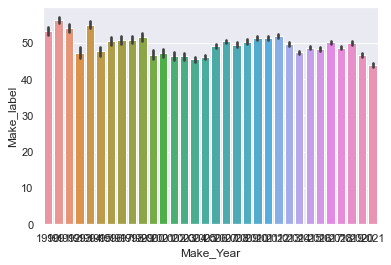

In [148]:
sns.barplot(dfUsedCar['Make_Year'], dfUsedCar['Make_label'])

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Make_Year', ylabel='Density'>

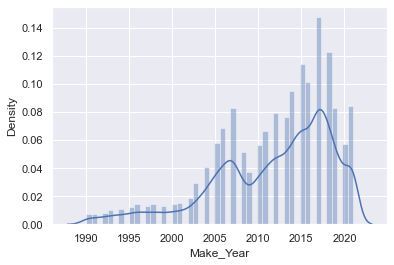

In [149]:
sns.distplot(dfUsedCar['Make_Year'])

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CC', ylabel='Density'>

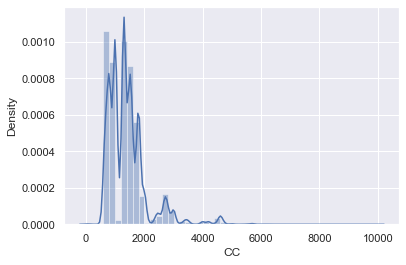

In [150]:
sns.distplot(dfUsedCar['CC'])

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Make_label', ylabel='Density'>

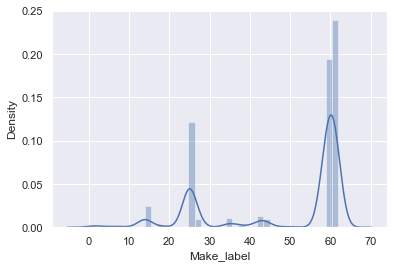

In [151]:
sns.distplot(dfUsedCar['Make_label'])

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


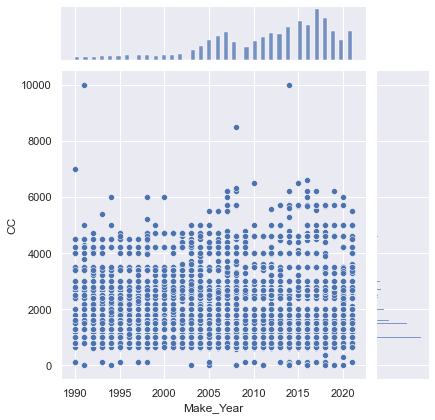

In [152]:
sns.jointplot(dfUsedCar['Make_Year'], dfUsedCar['CC'])

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


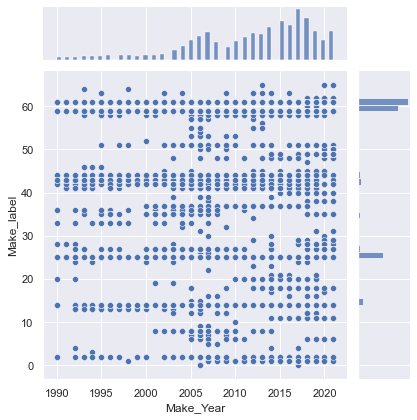

In [153]:
sns.jointplot(dfUsedCar['Make_Year'], dfUsedCar['Make_label'])

# 7 Create Model

In [156]:
X = dfUsedCar.drop(['Version','Registered City','Model'],axis=1)
Y = dfUsedCar['Price']

In [157]:
print(X)

           Price  Make_Year    CC  Mileage  Make_label  Adam  Audi  BMW  \
0      7400000.0       2019  1500     2000          25     0     0    0   
1      1065000.0       2019   660    68000          43     0     0    0   
2      9300000.0       2015  1800    70000           1     0     1    0   
3      2375000.0       2014  1500    99900          61     0     0    0   
4      2600000.0       2017  1300    55000          25     0     0    0   
...          ...        ...   ...      ...         ...   ...   ...  ...   
80567   750000.0       2015   800    98000          59     0     0    0   
80568  1480000.0       2020   660     7800          59     0     0    0   
80569  2700000.0       2016  1300    81000          61     0     0    0   
80570   600000.0       2013  1000        2          18     0     0    0   
80571  2620000.0       2013  1800   100000          25     0     0    0   

       Bentley  Buick  ...  United  Volkswagen  Volvo  ZOTYE  Assembly_label  \
0            0     

In [158]:
print(Y)

0        7400000.0
1        1065000.0
2        9300000.0
3        2375000.0
4        2600000.0
           ...    
80567     750000.0
80568    1480000.0
80569    2700000.0
80570     600000.0
80571    2620000.0
Name: Price, Length: 80572, dtype: object


# 7.1 create train and test dataset

In [159]:
#create train and test dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.4, random_state = 40)


In [160]:

X_train.head()

,Price,Make_Year,CC,Mileage,Make_label,Adam,Audi,BMW,Bentley,Buick,...,United,Volkswagen,Volvo,ZOTYE,Assembly_label,Imported,Local,Transmission_label,Automatic,Manual
54052,520000.0,2005,800,80000,59,0,0,0,0,0,...,0,0,0,0,1,0,1,1,0,1
4734,2445000.0,2018,1500,42000,25,0,0,0,0,0,...,0,0,0,0,1,0,1,1,0,1
22820,615000.0,2008,800,55000,59,0,0,0,0,0,...,0,0,0,0,1,0,1,1,0,1
48989,1854000.0,2021,1800,1,61,0,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0
62031,1515000.0,2017,1000,60000,59,0,0,0,0,0,...,0,0,0,0,1,0,1,1,0,1


# 7.2 Apply Linear regression

In [161]:
linear = LinearRegression()

In [162]:
linear.fit(X_train,Y_train)

LinearRegression()

# 7.3 Linear regression Model evaluation

In [163]:
#Predict using training dataset
training_dataset_prediction = linear.predict(X_train)

In [164]:
#R squatrd error
r_squatrd_error_score = metrics.r2_score(Y_train, training_dataset_prediction)
print("R squared Error = ", r_squatrd_error_score)

R squared Error =  1.0


# 7.4 Visualize the actual prices and the predicted prices

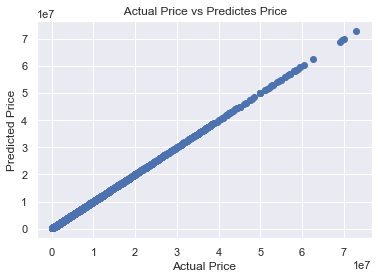

In [165]:
plt.scatter(Y_train,training_dataset_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Price vs Predictes Price")
plt.show()

In [166]:
#Predict using testing dataset
test_dataset_prediction = linear.predict(X_test)

In [167]:
#R squatrd error
r_squatrd_error_score = metrics.r2_score(Y_test, test_dataset_prediction)
print("R squared Error = ", r_squatrd_error_score)

R squared Error =  1.0


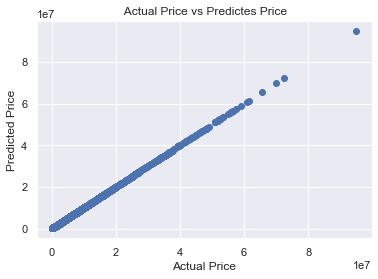

In [168]:
plt.scatter(Y_test,test_dataset_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Price vs Predictes Price")
plt.show()